In [6]:
# import the required libraries
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns

In [10]:
import sys
import os

# Add the project root to sys.path (adjust the path as needed)
project_root = os.path.abspath(os.path.join(os.getcwd(), "..")) 
sys.path.append(project_root)

# Now try to import the DataIngestion class
from src.components.data_ingestion import DataIngestion

# Initialize the DataIngestion object
ingestion = DataIngestion()

# Load data from the database
df_city_weather = ingestion.load_dataframe('city_weather')
df_drivers = ingestion.load_dataframe('drivers_table')
df_routes = ingestion.load_dataframe('routes_table')
df_routes_weather  = ingestion.load_dataframe('routes_weather')
df_traffic = ingestion.load_dataframe('traffic_table')
df_truck_schedule = ingestion.load_dataframe('truck_schedule_table')
df_trucks = ingestion.load_dataframe('trucks_table')


# Display the data
print(df_drivers.head())
print(df_routes.head())

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1044630
Connected. Call `.close()` to terminate connection gracefully.
Connected to database: postgres
    driver_id               name gender  age  experience driving_style  \
0  d9f30553-6       Daniel Marks   male   47           5     proactive   
1  82de7bb8-2      Clifford Carr   male   47          14     proactive   
2  7e789842-4  Terry Faulkner MD   male   41           9  conservative   
3  b2555587-8     Brendan Jacobs   male   44          10     proactive   
4  b2e58421-d      Vincent Davis   male   41          10     proactive   

   ratings  vehicle_no  average_speed_mph  
0        7    42302347              62.22  
1        4    27867488              60.89  
2        2    13927774              53.67  
3        2    69577118              59.82  
4        7    28650047              62.65  
     route_id   origin_id destination_id  distance  a

In [11]:
df_city_weather.head()

,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,C-927ceb5e,2019-01-01,0,30,11,Light snow,0.0,86,6,1019,0,0,0,0
1,C-927ceb5e,2019-01-01,100,28,12,Light snow,0.0,86,5,1021,0,0,0,0
2,C-927ceb5e,2019-01-01,200,28,13,Moderate snow,0.0,85,4,1022,0,0,0,0
3,C-927ceb5e,2019-01-01,300,28,14,Moderate snow,0.0,84,3,1024,0,0,0,0
4,C-927ceb5e,2019-01-01,400,28,13,Moderate snow,0.0,84,3,1025,0,0,0,0


In [12]:
df_city_weather.shape

(55176, 14)

In [13]:
df_city_weather.describe()

,hour,temp,wind_speed,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
count,55176.000000,55176.000000,55176.000000,55176.000000,55176.000000,55176.000000,55176.000000,55176.0,55176.0,55176.0,55176.0
mean,1150.000000,36.896169,7.888647,0.003614,70.808141,5.168878,1019.413404,0.0,0.0,0.0,0.0
std,692.224928,21.766273,4.349798,0.023185,21.078367,1.639954,8.543195,0.0,0.0,0.0,0.0
min,0.000000,-35.000000,0.000000,0.000000,3.000000,0.000000,988.000000,0.0,0.0,0.0,0.0
25%,575.000000,23.000000,5.000000,0.000000,57.000000,6.000000,1014.000000,0.0,0.0,0.0,0.0
50%,1150.000000,34.000000,7.000000,0.000000,75.000000,6.000000,1019.000000,0.0,0.0,0.0,0.0
75%,1725.000000,48.000000,11.000000,0.000000,88.000000,6.000000,1025.000000,0.0,0.0,0.0,0.0
max,2300.000000,104.000000,33.000000,0.800000,100.000000,6.000000,1049.000000,0.0,0.0,0.0,0.0


In [14]:
df_city_weather.isnull().sum()

city_id            0
date               0
hour               0
temp               0
wind_speed         0
description        0
precip             0
humidity           0
visibility         0
pressure           0
chanceofrain       0
chanceoffog        0
chanceofsnow       0
chanceofthunder    0
dtype: int64

In [15]:
df_city_weather["city_id"].value_counts

<bound method IndexOpsMixin.value_counts of 0        C-927ceb5e
1        C-927ceb5e
2        C-927ceb5e
3        C-927ceb5e
4        C-927ceb5e
            ...    
55171    C-594514f8
55172    C-594514f8
55173    C-594514f8
55174    C-594514f8
55175    C-594514f8
Name: city_id, Length: 55176, dtype: object>

<Axes: >

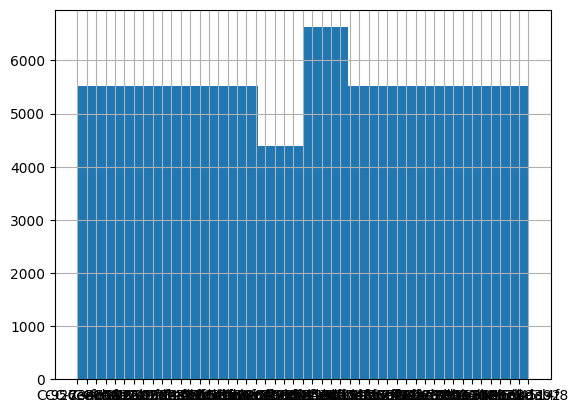

In [16]:
df_city_weather["city_id"].hist()

2024-09-23 14:20:23,219 WARNING: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='humidity', ylabel='Density'>

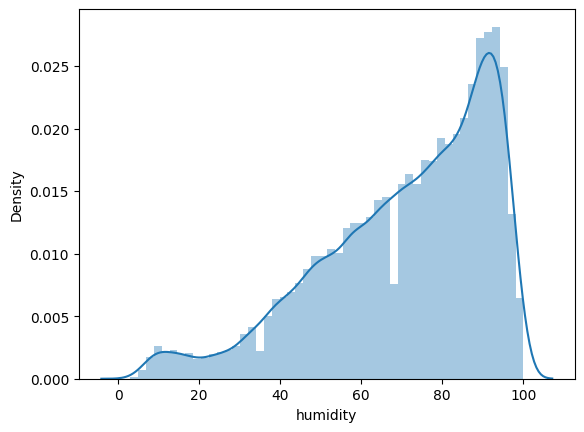

In [17]:
sns.distplot(df_city_weather['humidity'])

In [18]:

#Add a custom index column starting from 1
df_city_weather['index_column'] = range(1, len(df_city_weather) + 1)

# Step 3: Reorder columns to make 'index_column' the first column
cols = ['index_column'] + [col for col in df_city_weather.columns if col != 'index_column']
df_city_weather = df_city_weather[cols]

In [19]:
df_city_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55176 entries, 0 to 55175
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index_column     55176 non-null  int64  
 1   city_id          55176 non-null  object 
 2   date             55176 non-null  object 
 3   hour             55176 non-null  int64  
 4   temp             55176 non-null  int64  
 5   wind_speed       55176 non-null  int64  
 6   description      55176 non-null  object 
 7   precip           55176 non-null  float64
 8   humidity         55176 non-null  int64  
 9   visibility       55176 non-null  int64  
 10  pressure         55176 non-null  int64  
 11  chanceofrain     55176 non-null  int64  
 12  chanceoffog      55176 non-null  int64  
 13  chanceofsnow     55176 non-null  int64  
 14  chanceofthunder  55176 non-null  int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 6.3+ MB


In [20]:
df_city_weather.drop(columns=['chanceofrain', 'chanceoffog', 'chanceofsnow', 'chanceofthunder'],inplace=True)



In [50]:
df_city_weather

,index_column,city_id,temp,wind_speed,description,datetime,event_time
0,1,C-927ceb5e,30,11,Light snow,2019-01-01 00:00:00,2024-09-17
1,2,C-927ceb5e,28,12,Light snow,2019-01-01 01:00:00,2024-09-17
2,3,C-927ceb5e,28,13,Moderate snow,2019-01-01 02:00:00,2024-09-17
3,4,C-927ceb5e,28,14,Moderate snow,2019-01-01 03:00:00,2024-09-17
4,5,C-927ceb5e,28,13,Moderate snow,2019-01-01 04:00:00,2024-09-17
...,...,...,...,...,...,...,...
55171,55172,C-594514f8,23,3,Cloudy,2019-02-15 19:00:00,2024-09-17
55172,55173,C-594514f8,23,3,Light snow,2019-02-15 20:00:00,2024-09-17
55173,55174,C-594514f8,23,3,Light snow,2019-02-15 21:00:00,2024-09-17
55174,55175,C-594514f8,23,2,Light snow,2019-02-15 22:00:00,2024-09-17


In [21]:
df_city_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55176 entries, 0 to 55175
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index_column  55176 non-null  int64  
 1   city_id       55176 non-null  object 
 2   date          55176 non-null  object 
 3   hour          55176 non-null  int64  
 4   temp          55176 non-null  int64  
 5   wind_speed    55176 non-null  int64  
 6   description   55176 non-null  object 
 7   precip        55176 non-null  float64
 8   humidity      55176 non-null  int64  
 9   visibility    55176 non-null  int64  
 10  pressure      55176 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 4.6+ MB


In [22]:
df_city_weather.dropna(inplace=True)


In [24]:
df_city_weather.dropna(axis=1, inplace=True)


In [25]:
df_city_weather.drop_duplicates(inplace=True)


In [26]:
df_city_weather.shape

(55176, 11)

In [27]:
df_city_weather

,index_column,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure
0,1,C-927ceb5e,2019-01-01,0,30,11,Light snow,0.0,86,6,1019
1,2,C-927ceb5e,2019-01-01,100,28,12,Light snow,0.0,86,5,1021
2,3,C-927ceb5e,2019-01-01,200,28,13,Moderate snow,0.0,85,4,1022
3,4,C-927ceb5e,2019-01-01,300,28,14,Moderate snow,0.0,84,3,1024
4,5,C-927ceb5e,2019-01-01,400,28,13,Moderate snow,0.0,84,3,1025
...,...,...,...,...,...,...,...,...,...,...,...
55171,55172,C-594514f8,2019-02-15,1900,23,3,Cloudy,0.0,74,6,1018
55172,55173,C-594514f8,2019-02-15,2000,23,3,Light snow,0.0,74,6,1018
55173,55174,C-594514f8,2019-02-15,2100,23,3,Light snow,0.0,75,6,1019
55174,55175,C-594514f8,2019-02-15,2200,23,2,Light snow,0.0,75,6,1019


In [28]:
df_city_weather['date'] = pd.to_datetime(df_city_weather['date'], errors='coerce')
df_city_weather

,index_column,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure
0,1,C-927ceb5e,2019-01-01,0,30,11,Light snow,0.0,86,6,1019
1,2,C-927ceb5e,2019-01-01,100,28,12,Light snow,0.0,86,5,1021
2,3,C-927ceb5e,2019-01-01,200,28,13,Moderate snow,0.0,85,4,1022
3,4,C-927ceb5e,2019-01-01,300,28,14,Moderate snow,0.0,84,3,1024
4,5,C-927ceb5e,2019-01-01,400,28,13,Moderate snow,0.0,84,3,1025
...,...,...,...,...,...,...,...,...,...,...,...
55171,55172,C-594514f8,2019-02-15,1900,23,3,Cloudy,0.0,74,6,1018
55172,55173,C-594514f8,2019-02-15,2000,23,3,Light snow,0.0,74,6,1018
55173,55174,C-594514f8,2019-02-15,2100,23,3,Light snow,0.0,75,6,1019
55174,55175,C-594514f8,2019-02-15,2200,23,2,Light snow,0.0,75,6,1019


In [29]:
# Convert the 'date' column to datetime format
df_city_weather['date'] = pd.to_datetime(df_city_weather['date'])

# Format the 'hour' column as HH:MM:SS
df_city_weather['hour'] = df_city_weather['hour'].apply(lambda x: f"{x // 100:02}:{x % 100:02}:00")

# Combine 'date' and 'hour' into a new 'datetime' column
df_city_weather['datetime'] = pd.to_datetime(df_city_weather['date'].astype(str) + ' ' + df_city_weather['hour'])

# Drop the 'date' and 'hour' columns
df_city_weather = df_city_weather.drop(columns=['date', 'hour'])


In [30]:
df_city_weather

,index_column,city_id,temp,wind_speed,description,precip,humidity,visibility,pressure,datetime
0,1,C-927ceb5e,30,11,Light snow,0.0,86,6,1019,2019-01-01 00:00:00
1,2,C-927ceb5e,28,12,Light snow,0.0,86,5,1021,2019-01-01 01:00:00
2,3,C-927ceb5e,28,13,Moderate snow,0.0,85,4,1022,2019-01-01 02:00:00
3,4,C-927ceb5e,28,14,Moderate snow,0.0,84,3,1024,2019-01-01 03:00:00
4,5,C-927ceb5e,28,13,Moderate snow,0.0,84,3,1025,2019-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
55171,55172,C-594514f8,23,3,Cloudy,0.0,74,6,1018,2019-02-15 19:00:00
55172,55173,C-594514f8,23,3,Light snow,0.0,74,6,1018,2019-02-15 20:00:00
55173,55174,C-594514f8,23,3,Light snow,0.0,75,6,1019,2019-02-15 21:00:00
55174,55175,C-594514f8,23,2,Light snow,0.0,75,6,1019,2019-02-15 22:00:00


In [31]:
# Add or update the 'event_time' column with a specific datetime value
df_city_weather['event_time'] = pd.to_datetime('2024-09-17')


In [32]:
df_city_weather

,index_column,city_id,temp,wind_speed,description,precip,humidity,visibility,pressure,datetime,event_time
0,1,C-927ceb5e,30,11,Light snow,0.0,86,6,1019,2019-01-01 00:00:00,2024-09-17
1,2,C-927ceb5e,28,12,Light snow,0.0,86,5,1021,2019-01-01 01:00:00,2024-09-17
2,3,C-927ceb5e,28,13,Moderate snow,0.0,85,4,1022,2019-01-01 02:00:00,2024-09-17
3,4,C-927ceb5e,28,14,Moderate snow,0.0,84,3,1024,2019-01-01 03:00:00,2024-09-17
4,5,C-927ceb5e,28,13,Moderate snow,0.0,84,3,1025,2019-01-01 04:00:00,2024-09-17
...,...,...,...,...,...,...,...,...,...,...,...
55171,55172,C-594514f8,23,3,Cloudy,0.0,74,6,1018,2019-02-15 19:00:00,2024-09-17
55172,55173,C-594514f8,23,3,Light snow,0.0,74,6,1018,2019-02-15 20:00:00,2024-09-17
55173,55174,C-594514f8,23,3,Light snow,0.0,75,6,1019,2019-02-15 21:00:00,2024-09-17
55174,55175,C-594514f8,23,2,Light snow,0.0,75,6,1019,2019-02-15 22:00:00,2024-09-17


In [33]:
df_city_weather.drop(columns=["precip","humidity","pressure","visibility"],inplace=True)

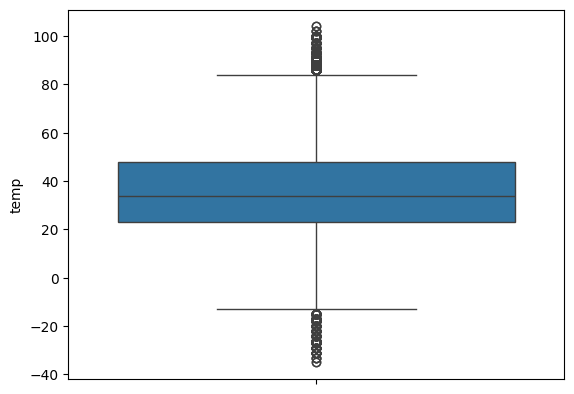

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for a specific column
sns.boxplot(y=df_city_weather['temp'])
plt.show()


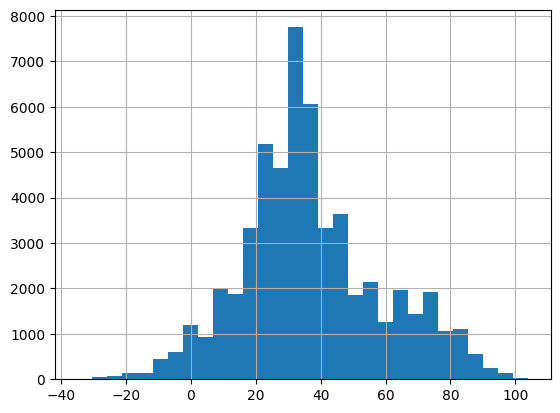

In [35]:
df_city_weather['temp'].hist(bins=30)
plt.show()


In [36]:
df_city_weather

,index_column,city_id,temp,wind_speed,description,datetime,event_time
0,1,C-927ceb5e,30,11,Light snow,2019-01-01 00:00:00,2024-09-17
1,2,C-927ceb5e,28,12,Light snow,2019-01-01 01:00:00,2024-09-17
2,3,C-927ceb5e,28,13,Moderate snow,2019-01-01 02:00:00,2024-09-17
3,4,C-927ceb5e,28,14,Moderate snow,2019-01-01 03:00:00,2024-09-17
4,5,C-927ceb5e,28,13,Moderate snow,2019-01-01 04:00:00,2024-09-17
...,...,...,...,...,...,...,...
55171,55172,C-594514f8,23,3,Cloudy,2019-02-15 19:00:00,2024-09-17
55172,55173,C-594514f8,23,3,Light snow,2019-02-15 20:00:00,2024-09-17
55173,55174,C-594514f8,23,3,Light snow,2019-02-15 21:00:00,2024-09-17
55174,55175,C-594514f8,23,2,Light snow,2019-02-15 22:00:00,2024-09-17


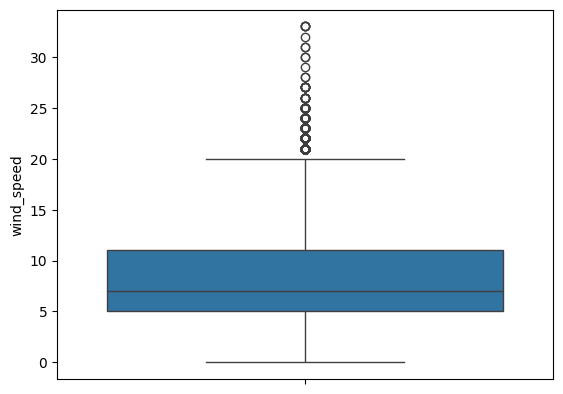

In [37]:
sns.boxplot(y=df_city_weather['wind_speed'])
plt.show()

In [38]:
df_city_weather

,index_column,city_id,temp,wind_speed,description,datetime,event_time
0,1,C-927ceb5e,30,11,Light snow,2019-01-01 00:00:00,2024-09-17
1,2,C-927ceb5e,28,12,Light snow,2019-01-01 01:00:00,2024-09-17
2,3,C-927ceb5e,28,13,Moderate snow,2019-01-01 02:00:00,2024-09-17
3,4,C-927ceb5e,28,14,Moderate snow,2019-01-01 03:00:00,2024-09-17
4,5,C-927ceb5e,28,13,Moderate snow,2019-01-01 04:00:00,2024-09-17
...,...,...,...,...,...,...,...
55171,55172,C-594514f8,23,3,Cloudy,2019-02-15 19:00:00,2024-09-17
55172,55173,C-594514f8,23,3,Light snow,2019-02-15 20:00:00,2024-09-17
55173,55174,C-594514f8,23,3,Light snow,2019-02-15 21:00:00,2024-09-17
55174,55175,C-594514f8,23,2,Light snow,2019-02-15 22:00:00,2024-09-17


In [58]:
# Columns from where outliers need to be removed
columns_to_check = ['temp','wind_speed']

# Function to remove outliers using IQR method
def remove_outliers_iqr(df_city_weather, columns):
    df_cleaned = df_city_weather.copy()  # Create a copy of the DataFrame to avoid modifying the original
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)  # 25th percentile (1st Quartile)
        Q3 = df_cleaned[column].quantile(0.75)  # 75th percentile (3rd Quartile)
        IQR = Q3 - Q1  # Interquartile Range
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out rows with outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# Apply the function to remove outliers from the specified columns
df_cleaned = remove_outliers_iqr(df_city_weather, columns_to_check)

# Display the cleaned DataFrame
print(df_cleaned)

       index_column     city_id  temp  wind_speed    description  \
0                 1  C-927ceb5e    30          11     Light snow   
1                 2  C-927ceb5e    28          12     Light snow   
2                 3  C-927ceb5e    28          13  Moderate snow   
3                 4  C-927ceb5e    28          14  Moderate snow   
4                 5  C-927ceb5e    28          13  Moderate snow   
...             ...         ...   ...         ...            ...   
55171         55172  C-594514f8    23           3         Cloudy   
55172         55173  C-594514f8    23           3     Light snow   
55173         55174  C-594514f8    23           3     Light snow   
55174         55175  C-594514f8    23           2     Light snow   
55175         55176  C-594514f8    23           2     Light snow   

                 datetime event_time  
0     2019-01-01 00:00:00 2024-09-17  
1     2019-01-01 01:00:00 2024-09-17  
2     2019-01-01 02:00:00 2024-09-17  
3     2019-01-01 03:00:00 2

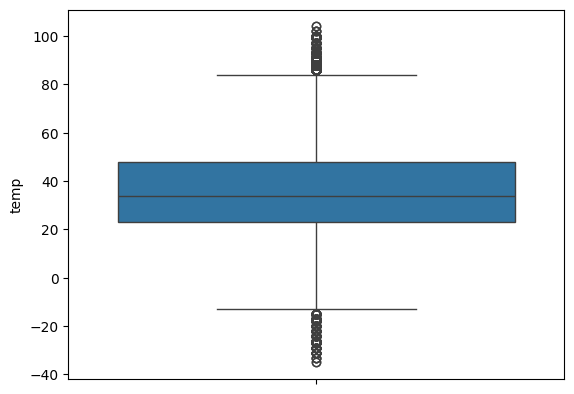

In [40]:
sns.boxplot(df_city_weather["temp"])
plt.show()

In [41]:
df_cleaned

,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,C-927ceb5e,2019-01-01,0,30,11,Light snow,0.0,86,6,1019,0,0,0,0
1,C-927ceb5e,2019-01-01,100,28,12,Light snow,0.0,86,5,1021,0,0,0,0
2,C-927ceb5e,2019-01-01,200,28,13,Moderate snow,0.0,85,4,1022,0,0,0,0
3,C-927ceb5e,2019-01-01,300,28,14,Moderate snow,0.0,84,3,1024,0,0,0,0
4,C-927ceb5e,2019-01-01,400,28,13,Moderate snow,0.0,84,3,1025,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55171,C-594514f8,2019-02-15,1900,23,3,Cloudy,0.0,74,6,1018,0,0,0,0
55172,C-594514f8,2019-02-15,2000,23,3,Light snow,0.0,74,6,1018,0,0,0,0
55173,C-594514f8,2019-02-15,2100,23,3,Light snow,0.0,75,6,1019,0,0,0,0
55174,C-594514f8,2019-02-15,2200,23,2,Light snow,0.0,75,6,1019,0,0,0,0


In [42]:
!pip install hopsworks

In [43]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()



Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1044630
Connected. Call `.close()` to terminate connection gracefully.


In [59]:
city_weather_fg = fs.get_or_create_feature_group(
    name="city_weather",
    version=1,
    description="city_weather",
    online_enabled=True,
    primary_key=['index_column'],
    event_time='event_time',
    
)

In [53]:
df_cleaned

,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,C-927ceb5e,2019-01-01,0,30,11,Light snow,0.0,86,6,1019,0,0,0,0
1,C-927ceb5e,2019-01-01,100,28,12,Light snow,0.0,86,5,1021,0,0,0,0
2,C-927ceb5e,2019-01-01,200,28,13,Moderate snow,0.0,85,4,1022,0,0,0,0
3,C-927ceb5e,2019-01-01,300,28,14,Moderate snow,0.0,84,3,1024,0,0,0,0
4,C-927ceb5e,2019-01-01,400,28,13,Moderate snow,0.0,84,3,1025,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55171,C-594514f8,2019-02-15,1900,23,3,Cloudy,0.0,74,6,1018,0,0,0,0
55172,C-594514f8,2019-02-15,2000,23,3,Light snow,0.0,74,6,1018,0,0,0,0
55173,C-594514f8,2019-02-15,2100,23,3,Light snow,0.0,75,6,1019,0,0,0,0
55174,C-594514f8,2019-02-15,2200,23,2,Light snow,0.0,75,6,1019,0,0,0,0


In [60]:
city_weather_fg.insert(df_cleaned)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1044630/fs/1036357/fg/1215840


Uploading Dataframe: 0.00% |          | Rows 0/53111 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: city_weather_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/1044630/jobs/named/city_weather_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x1cbbbc8ab30>, None)

#drivers_table

In [227]:
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driver_id          1300 non-null   object 
 1   name               1300 non-null   object 
 2   gender             1277 non-null   object 
 3   age                1300 non-null   int64  
 4   experience         1300 non-null   int64  
 5   driving_style      1248 non-null   object 
 6   ratings            1300 non-null   int64  
 7   vehicle_no         1300 non-null   int64  
 8   average_speed_mph  1300 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 91.5+ KB


In [2]:
import sys
import os

# Add the project root to sys.path (adjust the path as needed)
project_root = os.path.abspath(os.path.join(os.getcwd(), "..")) 
sys.path.append(project_root)

# Now try to import the DataIngestion class
from src.components.data_ingestion import DataIngestion

# Initialize the DataIngestion object
ingestion = DataIngestion()

# Load data from the database
df_city_weather = ingestion.load_dataframe('city_weather')
df_drivers = ingestion.load_dataframe('drivers_table')
df_routes = ingestion.load_dataframe('routes_table')
df_routes_weather  = ingestion.load_dataframe('routes_weather')
df_traffic = ingestion.load_dataframe('traffic_table')
df_truck_schedule = ingestion.load_dataframe('truck_schedule_table')
df_trucks = ingestion.load_dataframe('trucks_table')


# Display the data
print(df_drivers.head())
print(df_routes.head())

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1044630
Connected. Call `.close()` to terminate connection gracefully.
Connected to database: postgres
    driver_id               name gender  age  experience driving_style  \
0  d9f30553-6       Daniel Marks   male   47           5     proactive   
1  82de7bb8-2      Clifford Carr   male   47          14     proactive   
2  7e789842-4  Terry Faulkner MD   male   41           9  conservative   
3  b2555587-8     Brendan Jacobs   male   44          10     proactive   
4  b2e58421-d      Vincent Davis   male   41          10     proactive   

   ratings  vehicle_no  average_speed_mph  
0        7    42302347              62.22  
1        4    27867488              60.89  
2        2    13927774              53.67  
3        2    69577118              59.82  
4        7    28650047              62.65  
     route_id   origin_id destination_id  distance  a

In [228]:
df.isnull().sum()

driver_id             0
name                  0
gender               23
age                   0
experience            0
driving_style        52
ratings               0
vehicle_no            0
average_speed_mph     0
dtype: int64

In [229]:
#df.dropna(inplace=True,axis=1)

In [3]:
df_drivers.isnull().sum()

driver_id             0
name                  0
gender               23
age                   0
experience            0
driving_style        52
ratings               0
vehicle_no            0
average_speed_mph     0
dtype: int64

In [4]:
 # Fills NaN with the last valid value (forward fill)
df_drivers[['gender','driving_style']] = df_drivers[['gender','driving_style']].fillna(method='ffill') 
 

2024-09-23 15:03:10,705 WARNING: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [5]:
df_drivers.isnull().sum()

driver_id            0
name                 0
gender               0
age                  0
experience           0
driving_style        0
ratings              0
vehicle_no           0
average_speed_mph    0
dtype: int64

In [28]:

#Add a custom index column starting from 1
df_drivers['index_column'] = range(1, len(df_drivers) + 1)

# Step 3: Reorder columns to make 'index_column' the first column
cols = ['index_column'] + [col for col in df_drivers.columns if col != 'index_column']
df_drivers = df_drivers[cols]

In [ ]:
cols = ['index_column'] + [col for col in df.columns if col != 'index_column']
df = df[cols]

In [29]:
df_drivers

,index_column,driver_id,name,gender,age,experience,driving_style,average_speed_mph,event_time
0,1,d9f30553-6,Daniel Marks,male,47,5,proactive,62.22,2024-09-17
1,2,82de7bb8-2,Clifford Carr,male,47,14,proactive,60.89,2024-09-17
2,3,7e789842-4,Terry Faulkner MD,male,41,9,conservative,53.67,2024-09-17
3,4,b2555587-8,Brendan Jacobs,male,44,10,proactive,59.82,2024-09-17
4,5,b2e58421-d,Vincent Davis,male,41,10,proactive,62.65,2024-09-17
...,...,...,...,...,...,...,...,...,...
1295,1296,57f77e99-8,Robert Johnson,male,60,26,proactive,60.64,2024-09-17
1296,1297,e64c4059-8,Patrick Hernandez,male,46,20,proactive,58.42,2024-09-17
1297,1298,7e6a0cf5-1,Richard Ortiz,male,49,10,conservative,48.29,2024-09-17
1298,1299,c4a966b0-b,Peter Rodriguez,male,49,5,conservative,43.14,2024-09-17


In [32]:
df_drivers.drop(columns=["vehicle_no","ratings"],inplace=True,axis=1)

KeyError: "['vehicle_no', 'ratings'] not found in axis"

In [31]:
df_drivers

,index_column,driver_id,name,gender,age,experience,driving_style,average_speed_mph,event_time
0,1,d9f30553-6,Daniel Marks,male,47,5,proactive,62.22,2024-09-17
1,2,82de7bb8-2,Clifford Carr,male,47,14,proactive,60.89,2024-09-17
2,3,7e789842-4,Terry Faulkner MD,male,41,9,conservative,53.67,2024-09-17
3,4,b2555587-8,Brendan Jacobs,male,44,10,proactive,59.82,2024-09-17
4,5,b2e58421-d,Vincent Davis,male,41,10,proactive,62.65,2024-09-17
...,...,...,...,...,...,...,...,...,...
1295,1296,57f77e99-8,Robert Johnson,male,60,26,proactive,60.64,2024-09-17
1296,1297,e64c4059-8,Patrick Hernandez,male,46,20,proactive,58.42,2024-09-17
1297,1298,7e6a0cf5-1,Richard Ortiz,male,49,10,conservative,48.29,2024-09-17
1298,1299,c4a966b0-b,Peter Rodriguez,male,49,5,conservative,43.14,2024-09-17


In [12]:
import pandas as pd

In [34]:
df_drivers['event_time']= pd.to_datetime('2024-09-17')

In [35]:
df_drivers

,index_column,driver_id,name,gender,age,experience,driving_style,average_speed_mph,event_time
0,1,d9f30553-6,Daniel Marks,male,47,5,proactive,62.22,2024-09-17
1,2,82de7bb8-2,Clifford Carr,male,47,14,proactive,60.89,2024-09-17
2,3,7e789842-4,Terry Faulkner MD,male,41,9,conservative,53.67,2024-09-17
3,4,b2555587-8,Brendan Jacobs,male,44,10,proactive,59.82,2024-09-17
4,5,b2e58421-d,Vincent Davis,male,41,10,proactive,62.65,2024-09-17
...,...,...,...,...,...,...,...,...,...
1295,1296,57f77e99-8,Robert Johnson,male,60,26,proactive,60.64,2024-09-17
1296,1297,e64c4059-8,Patrick Hernandez,male,46,20,proactive,58.42,2024-09-17
1297,1298,7e6a0cf5-1,Richard Ortiz,male,49,10,conservative,48.29,2024-09-17
1298,1299,c4a966b0-b,Peter Rodriguez,male,49,5,conservative,43.14,2024-09-17


In [17]:
import seaborn as sns

In [20]:
import matplotlib.pyplot as plt


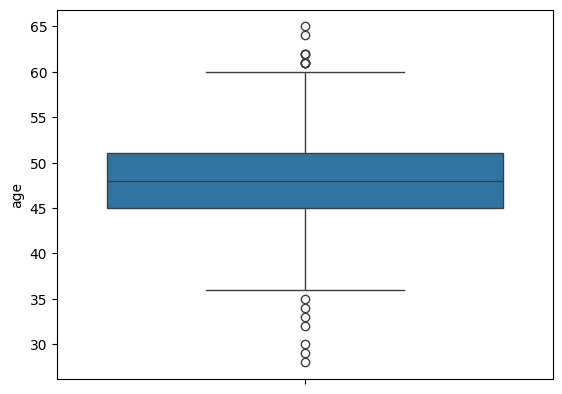

In [21]:
sns.boxplot(y=df_drivers["age"])
plt.show()

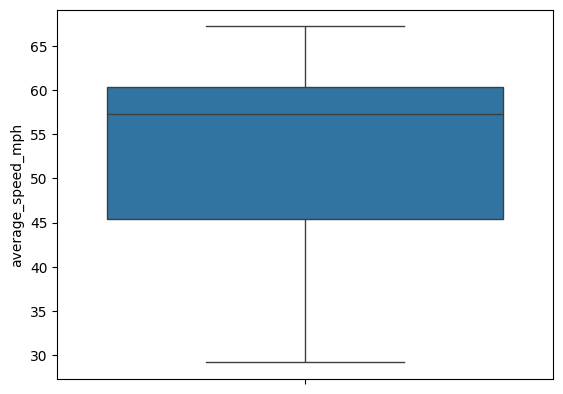

In [22]:
sns.boxplot(y=df_drivers["average_speed_mph"])
plt.show()

In [36]:

# Columns from where outliers need to be removed
columns_to_check = ["age"]

# Function to remove outliers using IQR method
def remove_outliers_iqr(df_drivers, columns):
    df_cleaned = df_drivers.copy()  # Create a copy of the DataFrame to avoid modifying the original
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)  # 25th percentile (1st Quartile)
        Q3 = df_cleaned[column].quantile(0.75)  # 75th percentile (3rd Quartile)
        IQR = Q3 - Q1  # Interquartile Range
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out rows with outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# Apply the function to remove outliers from the specified columns
df_cleaned = remove_outliers_iqr(df_drivers, columns_to_check)

# Display the cleaned DataFrame
print(df_cleaned)


      index_column   driver_id               name gender  age  experience  \
0                1  d9f30553-6       Daniel Marks   male   47           5   
1                2  82de7bb8-2      Clifford Carr   male   47          14   
2                3  7e789842-4  Terry Faulkner MD   male   41           9   
3                4  b2555587-8     Brendan Jacobs   male   44          10   
4                5  b2e58421-d      Vincent Davis   male   41          10   
...            ...         ...                ...    ...  ...         ...   
1295          1296  57f77e99-8     Robert Johnson   male   60          26   
1296          1297  e64c4059-8  Patrick Hernandez   male   46          20   
1297          1298  7e6a0cf5-1      Richard Ortiz   male   49          10   
1298          1299  c4a966b0-b    Peter Rodriguez   male   49           5   
1299          1300  e5d104b5-1   Michael Robinson   male   56          24   

     driving_style  average_speed_mph event_time  
0        proactive      

In [38]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1044630
Connected. Call `.close()` to terminate connection gracefully.


In [39]:
drivers_fg = fs.get_or_create_feature_group(
    name="drivers",
    version=1,
    description="drivers",
    online_enabled=True,
    primary_key=['index_column'],
    event_time='event_time',
    
)

In [41]:
drivers_fg.insert(df_drivers)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1044630/fs/1036357/fg/1216842


Uploading Dataframe: 0.00% |          | Rows 0/1300 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: drivers_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/1044630/jobs/named/drivers_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x22a2cf285b0>, None)

#routes_table

In [43]:
df_routes

,route_id,origin_id,destination_id,distance,average_hours,index_column
0,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70,1
1,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96,2
2,R-4beec5fd,C-927ceb5e,C-4fe0fa24,6078.46,121.57,3
3,R-8d7a7fb2,C-927ceb5e,C-451776b7,1543.01,30.86,4
4,R-b236e347,C-927ceb5e,C-d80a1e7d,310.75,6.22,5
...,...,...,...,...,...,...
2347,R-cc900a65,C-594514f8,C-2e349ccd,8283.93,165.68,2348
2348,R-64f64afb,C-594514f8,C-56b68559,272.90,5.46,2349
2349,R-0e0ac567,C-594514f8,C-328bd8d3,172.74,3.45,2350
2350,R-5ccd3200,C-594514f8,C-841ebdcb,960.93,19.22,2351


In [46]:
#Add a custom index column starting from 1
# Step 1: Create the 'index_column' with a range starting from 1
df_routes['index_column'] = range(1, len(df_routes) + 1)

# Step 2: Reorder columns to make 'index_column' the first column
cols = ['index_column'] + [col for col in df_routes.columns if col != 'index_column']
df_routes = df_routes[cols]


In [47]:

df_routes

,index_column,route_id,origin_id,destination_id,distance,average_hours
0,1,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70
1,2,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96
2,3,R-4beec5fd,C-927ceb5e,C-4fe0fa24,6078.46,121.57
3,4,R-8d7a7fb2,C-927ceb5e,C-451776b7,1543.01,30.86
4,5,R-b236e347,C-927ceb5e,C-d80a1e7d,310.75,6.22
...,...,...,...,...,...,...
2347,2348,R-cc900a65,C-594514f8,C-2e349ccd,8283.93,165.68
2348,2349,R-64f64afb,C-594514f8,C-56b68559,272.90,5.46
2349,2350,R-0e0ac567,C-594514f8,C-328bd8d3,172.74,3.45
2350,2351,R-5ccd3200,C-594514f8,C-841ebdcb,960.93,19.22


In [246]:
df

,index_column,route_id,origin_id,destination_id,distance,average_hours
0,1,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70
1,2,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96
2,3,R-4beec5fd,C-927ceb5e,C-4fe0fa24,6078.46,121.57
3,4,R-8d7a7fb2,C-927ceb5e,C-451776b7,1543.01,30.86
4,5,R-b236e347,C-927ceb5e,C-d80a1e7d,310.75,6.22
...,...,...,...,...,...,...
2347,2348,R-cc900a65,C-594514f8,C-2e349ccd,8283.93,165.68
2348,2349,R-64f64afb,C-594514f8,C-56b68559,272.90,5.46
2349,2350,R-0e0ac567,C-594514f8,C-328bd8d3,172.74,3.45
2350,2351,R-5ccd3200,C-594514f8,C-841ebdcb,960.93,19.22


In [49]:
# Ensure that 'df_routes' is not a view
df_routes = df_routes.copy()

# Set 'event_time' for all rows
df_routes.loc[:, 'event_time'] = pd.to_datetime('2024-09-17')


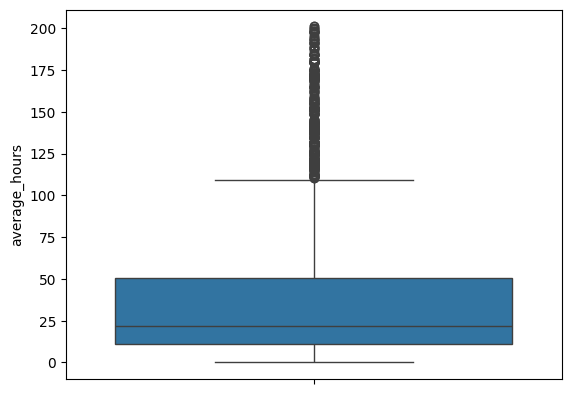

In [50]:
sns.boxplot(y=df_routes["average_hours"])
plt.show()

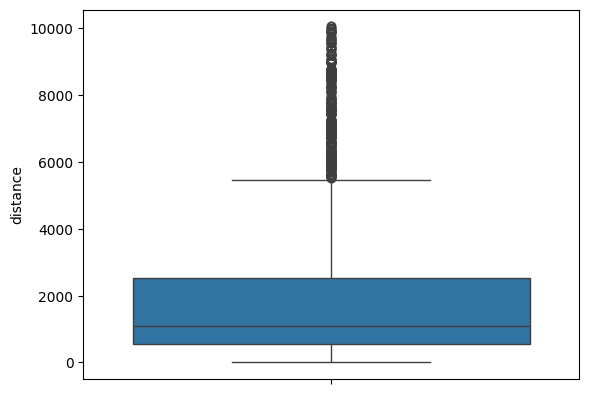

In [51]:
sns.boxplot(y=df_routes["distance"])
plt.show()

In [52]:
df_routes.isnull().sum()

index_column      0
route_id          0
origin_id         0
destination_id    0
distance          0
average_hours     0
event_time        0
dtype: int64

In [53]:
df_routes.dropna()

,index_column,route_id,origin_id,destination_id,distance,average_hours,event_time
0,1,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70,2024-09-17
1,2,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96,2024-09-17
2,3,R-4beec5fd,C-927ceb5e,C-4fe0fa24,6078.46,121.57,2024-09-17
3,4,R-8d7a7fb2,C-927ceb5e,C-451776b7,1543.01,30.86,2024-09-17
4,5,R-b236e347,C-927ceb5e,C-d80a1e7d,310.75,6.22,2024-09-17
...,...,...,...,...,...,...,...
2347,2348,R-cc900a65,C-594514f8,C-2e349ccd,8283.93,165.68,2024-09-17
2348,2349,R-64f64afb,C-594514f8,C-56b68559,272.90,5.46,2024-09-17
2349,2350,R-0e0ac567,C-594514f8,C-328bd8d3,172.74,3.45,2024-09-17
2350,2351,R-5ccd3200,C-594514f8,C-841ebdcb,960.93,19.22,2024-09-17


In [54]:
df_routes.drop_duplicates()

,index_column,route_id,origin_id,destination_id,distance,average_hours,event_time
0,1,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70,2024-09-17
1,2,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96,2024-09-17
2,3,R-4beec5fd,C-927ceb5e,C-4fe0fa24,6078.46,121.57,2024-09-17
3,4,R-8d7a7fb2,C-927ceb5e,C-451776b7,1543.01,30.86,2024-09-17
4,5,R-b236e347,C-927ceb5e,C-d80a1e7d,310.75,6.22,2024-09-17
...,...,...,...,...,...,...,...
2347,2348,R-cc900a65,C-594514f8,C-2e349ccd,8283.93,165.68,2024-09-17
2348,2349,R-64f64afb,C-594514f8,C-56b68559,272.90,5.46,2024-09-17
2349,2350,R-0e0ac567,C-594514f8,C-328bd8d3,172.74,3.45,2024-09-17
2350,2351,R-5ccd3200,C-594514f8,C-841ebdcb,960.93,19.22,2024-09-17


In [55]:
# Columns from where outliers need to be removed
columns_to_check = ['distance' ,'average_hours']

# Function to remove outliers using IQR method
def remove_outliers_iqr(df_routes, columns):
    df_cleaned = df_routes.copy()  # Create a copy of the DataFrame to avoid modifying the original
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)  # 25th percentile (1st Quartile)
        Q3 = df_cleaned[column].quantile(0.75)  # 75th percentile (3rd Quartile)
        IQR = Q3 - Q1  # Interquartile Range
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out rows with outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# Apply the function to remove outliers from the specified columns
df_cleaned = remove_outliers_iqr(df_routes, columns_to_check)

# Display the cleaned DataFrame
print(df_cleaned)



      index_column    route_id   origin_id destination_id  distance  \
0                1  R-ada2a391  C-927ceb5e     C-56e39a5e   1735.06   
1                2  R-ae0ef31f  C-927ceb5e     C-73ae5412   1498.24   
3                4  R-8d7a7fb2  C-927ceb5e     C-451776b7   1543.01   
4                5  R-b236e347  C-927ceb5e     C-d80a1e7d    310.75   
5                6  R-93f348a8  C-927ceb5e     C-c92599e2   1810.21   
...            ...         ...         ...            ...       ...   
2346          2347  R-88d4c432  C-594514f8     C-90e30162    578.31   
2348          2349  R-64f64afb  C-594514f8     C-56b68559    272.90   
2349          2350  R-0e0ac567  C-594514f8     C-328bd8d3    172.74   
2350          2351  R-5ccd3200  C-594514f8     C-841ebdcb    960.93   
2351          2352  R-38a366a9  C-594514f8     C-e6dcda92    472.61   

      average_hours event_time  
0             34.70 2024-09-17  
1             29.96 2024-09-17  
3             30.86 2024-09-17  
4              

In [57]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()

routes_fg = fs.get_or_create_feature_group(
    name="routes",
    version=1,
    description="routes",
    online_enabled=True,
    primary_key=['index_column'],
    event_time='event_time',
    
)

routes_fg.insert(df_cleaned)


Connection closed.
Connected. Call `.close()` to terminate connection gracefully.



Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1044630
Connected. Call `.close()` to terminate connection gracefully.


Uploading Dataframe: 0.00% |          | Rows 0/1810 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: routes_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/1044630/jobs/named/routes_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x22a8475dea0>, None)

#routes_weather

In [58]:
df_routes_weather

,route_id,Date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,R-ada2a391,2019-01-01 00:00:00,30,11,Heavy snow,0.0,90,1,1010,0,0,0,0
1,R-ada2a391,2019-01-01 06:00:00,30,11,Heavy snow,0.0,91,3,1012,0,0,0,0
2,R-ada2a391,2019-01-02 00:00:00,28,11,Cloudy,0.0,91,4,1013,0,0,0,0
3,R-ada2a391,2019-01-02 06:00:00,27,11,Cloudy,0.0,92,6,1015,0,0,0,0
4,R-ada2a391,2019-01-03 00:00:00,27,9,Cloudy,0.0,93,6,1016,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425707,R-2fd2ee05,2019-02-12 18:00:00,70,12,Sunny,0.0,53,6,1015,0,0,0,0
425708,R-2fd2ee05,2019-02-13 12:00:00,68,11,Sunny,0.0,57,6,1015,0,0,0,0
425709,R-2fd2ee05,2019-02-13 18:00:00,66,9,Sunny,0.0,62,6,1015,0,0,0,0
425710,R-2fd2ee05,2019-02-14 12:00:00,63,7,Clear,0.0,66,6,1015,0,0,0,0


In [69]:
#Add a custom index column starting from 1
df_routes_weather['index_column'] = range(1, len(df_routes_weather) + 1)

# Step 3: Reorder columns to make 'index_column' the first column
cols = ['index_column'] + [col for col in df_routes_weather.columns if col != 'index_column']
df_routes_weather = df_routes_weather[cols]


In [70]:
df_routes_weather

,index_column,route_id,Date,temp,wind_speed,description,humidity,visibility,pressure,event_time
0,1,R-ada2a391,2019-01-01 00:00:00,30,11,Heavy snow,90,1,1010,2024-09-17
1,2,R-ada2a391,2019-01-01 06:00:00,30,11,Heavy snow,91,3,1012,2024-09-17
2,3,R-ada2a391,2019-01-02 00:00:00,28,11,Cloudy,91,4,1013,2024-09-17
3,4,R-ada2a391,2019-01-02 06:00:00,27,11,Cloudy,92,6,1015,2024-09-17
4,5,R-ada2a391,2019-01-03 00:00:00,27,9,Cloudy,93,6,1016,2024-09-17
...,...,...,...,...,...,...,...,...,...,...
425707,425708,R-2fd2ee05,2019-02-12 18:00:00,70,12,Sunny,53,6,1015,2024-09-17
425708,425709,R-2fd2ee05,2019-02-13 12:00:00,68,11,Sunny,57,6,1015,2024-09-17
425709,425710,R-2fd2ee05,2019-02-13 18:00:00,66,9,Sunny,62,6,1015,2024-09-17
425710,425711,R-2fd2ee05,2019-02-14 12:00:00,63,7,Clear,66,6,1015,2024-09-17


In [60]:
df_routes_weather.isnull().sum()

route_id           0
Date               0
temp               0
wind_speed         0
description        0
precip             0
humidity           0
visibility         0
pressure           0
chanceofrain       0
chanceoffog        0
chanceofsnow       0
chanceofthunder    0
dtype: int64

In [61]:
df_routes_weather.drop(columns=["chanceofrain", "chanceoffog", "chanceofsnow", "chanceofthunder"], inplace=True)


In [62]:
df_routes_weather['event_time']= pd.to_datetime('2024-09-17')

In [63]:
df_routes_weather

,route_id,Date,temp,wind_speed,description,precip,humidity,visibility,pressure,event_time
0,R-ada2a391,2019-01-01 00:00:00,30,11,Heavy snow,0.0,90,1,1010,2024-09-17
1,R-ada2a391,2019-01-01 06:00:00,30,11,Heavy snow,0.0,91,3,1012,2024-09-17
2,R-ada2a391,2019-01-02 00:00:00,28,11,Cloudy,0.0,91,4,1013,2024-09-17
3,R-ada2a391,2019-01-02 06:00:00,27,11,Cloudy,0.0,92,6,1015,2024-09-17
4,R-ada2a391,2019-01-03 00:00:00,27,9,Cloudy,0.0,93,6,1016,2024-09-17
...,...,...,...,...,...,...,...,...,...,...
425707,R-2fd2ee05,2019-02-12 18:00:00,70,12,Sunny,0.0,53,6,1015,2024-09-17
425708,R-2fd2ee05,2019-02-13 12:00:00,68,11,Sunny,0.0,57,6,1015,2024-09-17
425709,R-2fd2ee05,2019-02-13 18:00:00,66,9,Sunny,0.0,62,6,1015,2024-09-17
425710,R-2fd2ee05,2019-02-14 12:00:00,63,7,Clear,0.0,66,6,1015,2024-09-17


In [72]:
df_routes_weather.drop(columns=["pressure"], inplace=True)


2024-09-23 16:48:33,484 WARNING: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
df_routes_weather

,index_column,route_id,Date,temp,wind_speed,description,humidity,visibility,event_time
0,1,R-ada2a391,2019-01-01 00:00:00,30,11,Heavy snow,90,1,2024-09-17
1,2,R-ada2a391,2019-01-01 06:00:00,30,11,Heavy snow,91,3,2024-09-17
2,3,R-ada2a391,2019-01-02 00:00:00,28,11,Cloudy,91,4,2024-09-17
3,4,R-ada2a391,2019-01-02 06:00:00,27,11,Cloudy,92,6,2024-09-17
4,5,R-ada2a391,2019-01-03 00:00:00,27,9,Cloudy,93,6,2024-09-17
...,...,...,...,...,...,...,...,...,...
425707,425708,R-2fd2ee05,2019-02-12 18:00:00,70,12,Sunny,53,6,2024-09-17
425708,425709,R-2fd2ee05,2019-02-13 12:00:00,68,11,Sunny,57,6,2024-09-17
425709,425710,R-2fd2ee05,2019-02-13 18:00:00,66,9,Sunny,62,6,2024-09-17
425710,425711,R-2fd2ee05,2019-02-14 12:00:00,63,7,Clear,66,6,2024-09-17


In [75]:
df_routes_weather.drop_duplicates()

,index_column,route_id,Date,temp,wind_speed,description,humidity,visibility,event_time
0,1,R-ada2a391,2019-01-01 00:00:00,30,11,Heavy snow,90,1,2024-09-17
1,2,R-ada2a391,2019-01-01 06:00:00,30,11,Heavy snow,91,3,2024-09-17
2,3,R-ada2a391,2019-01-02 00:00:00,28,11,Cloudy,91,4,2024-09-17
3,4,R-ada2a391,2019-01-02 06:00:00,27,11,Cloudy,92,6,2024-09-17
4,5,R-ada2a391,2019-01-03 00:00:00,27,9,Cloudy,93,6,2024-09-17
...,...,...,...,...,...,...,...,...,...
425707,425708,R-2fd2ee05,2019-02-12 18:00:00,70,12,Sunny,53,6,2024-09-17
425708,425709,R-2fd2ee05,2019-02-13 12:00:00,68,11,Sunny,57,6,2024-09-17
425709,425710,R-2fd2ee05,2019-02-13 18:00:00,66,9,Sunny,62,6,2024-09-17
425710,425711,R-2fd2ee05,2019-02-14 12:00:00,63,7,Clear,66,6,2024-09-17


In [77]:
# Columns from where outliers need to be removed
columns_to_check = ['temp','wind_speed','humidity',"visibility"]

# Function to remove outliers using IQR method
def remove_outliers_iqr(df_routes_weather, columns):
    df_cleaned = df_routes_weather.copy()  # Create a copy of the DataFrame to avoid modifying the original
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)  # 25th percentile (1st Quartile)
        Q3 = df_cleaned[column].quantile(0.75)  # 75th percentile (3rd Quartile)
        IQR = Q3 - Q1  # Interquartile Range
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out rows with outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# Apply the function to remove outliers from the specified columns
df_cleaned = remove_outliers_iqr(df_routes_weather, columns_to_check)

# Display the cleaned DataFrame
print(df_cleaned)



        index_column    route_id                 Date  temp  wind_speed  \
3                  4  R-ada2a391  2019-01-02 06:00:00    27          11   
4                  5  R-ada2a391  2019-01-03 00:00:00    27           9   
5                  6  R-ada2a391  2019-01-03 06:00:00    27           8   
6                  7  R-ada2a391  2019-01-04 00:00:00    27           7   
7                  8  R-ada2a391  2019-01-04 06:00:00    28           8   
...              ...         ...                  ...   ...         ...   
425707        425708  R-2fd2ee05  2019-02-12 18:00:00    70          12   
425708        425709  R-2fd2ee05  2019-02-13 12:00:00    68          11   
425709        425710  R-2fd2ee05  2019-02-13 18:00:00    66           9   
425710        425711  R-2fd2ee05  2019-02-14 12:00:00    63           7   
425711        425712  R-2fd2ee05  2019-02-14 18:00:00    61           6   

          description  humidity  visibility event_time  
3              Cloudy        92           

In [78]:
df_cleaned

,index_column,route_id,Date,temp,wind_speed,description,humidity,visibility,event_time
3,4,R-ada2a391,2019-01-02 06:00:00,27,11,Cloudy,92,6,2024-09-17
4,5,R-ada2a391,2019-01-03 00:00:00,27,9,Cloudy,93,6,2024-09-17
5,6,R-ada2a391,2019-01-03 06:00:00,27,8,Partly cloudy,94,6,2024-09-17
6,7,R-ada2a391,2019-01-04 00:00:00,27,7,Partly cloudy,94,6,2024-09-17
7,8,R-ada2a391,2019-01-04 06:00:00,28,8,Partly cloudy,92,6,2024-09-17
...,...,...,...,...,...,...,...,...,...
425707,425708,R-2fd2ee05,2019-02-12 18:00:00,70,12,Sunny,53,6,2024-09-17
425708,425709,R-2fd2ee05,2019-02-13 12:00:00,68,11,Sunny,57,6,2024-09-17
425709,425710,R-2fd2ee05,2019-02-13 18:00:00,66,9,Sunny,62,6,2024-09-17
425710,425711,R-2fd2ee05,2019-02-14 12:00:00,63,7,Clear,66,6,2024-09-17


In [269]:
df.to_csv(r"C:\Desktop\Truck Project\data\cleaned\cleaned_routes_weather.csv",index=False)